# Derek Jeter: Jack of all Trades?
##### Wally Chang, Lexi Valachovic, Matt Maitland

### Derek Sanderson Jeter is an American former professional baseball shortstop, businessman, and baseball executive. As a player, Jeter spent his entire 20-year MLB career with the New York Yankees. Nicknamed "The Captain", Derek Jeter is soon to be inducted into the MLB Hall of Fame. There's no denying he was an amazing player, arguably the best player to ever play the shortstop position, a defensive position. But in baseball, there's two sides to the game. We will analyze Derek Jeter's batting (offensive) performance over his career to see if he can succeed as a batter as well as a shortstop. The shortstop positions himself between the third baseman and the second-base bag. Shortstops are an integral component of turning double plays. On balls hit to the left side of the infield, a shortstop must cleanly field the ball and accurately throw it to the second baseman covering the second-base bag. To find out if Jeter can do it all, we first selected  group of offensive baseball stats from Derek Jeter's career to first look at him individually. Then we pulled in other Yankees players to see if his offensive skills matched his teammates. As we furthered our investigation we found that he contributed more to the game as a fielder than a batter. He is not a power hitter and is unlikely to get a homerun when he is up to bat. He fell short in homeruns when compared to other players, but overall still contributed more to a win in the selected season through his fielding performance.

# Abstract

In this exploration, we applied various statistical evaluation techniques to a select group of offensive baseball stats from Derek Jeter's career in order to, first: analyze which one of his stats contributed most to Yankees game wins, and to, second: determine whether Jeter's career and stats stack up against other great baseball players in his era (specifically Alex Rodriguez, Nomar Garciaparra, and Bernie Williams). 

This exploration is organized as follows
1. Research Questions and Data Description 
***
2. Preregistration of Analyses
***
3. Jeter Calculations and Statistical Tests: An examination of Jeter's stats, which one contributed most to Yankees wins?
***
4. Jeter's Yearly Stats: Determining Jeter's best stat year, so that player-player comparisons can be made later on based on said year. 
***
5. Comparing Jeter to Rodriguez: Comparing the careers of Jeter and Rodriguez to see who was greater over the long run
***
6. Comparing Jeter to Williams and Garciaparra: Specifically focusing on Jeter's best batting season (1999), comparing Jeter's batting statistics to other great batters in that year, Bernie Williams and Nomar Garciaparra

# Research Questions

How valuable was Derek Jeter to the NY Yankees when up to bat?

How much did Derek Jeter contribute to the wins based on the batting variables we chose to include and which stat contriubted the most?

Looking at other players, was Derek Jeter significantly better at getting a win? Did he contribute more?

# Data Description


Year - the season the data is from.

RSLT - Result: Win or Loss, tracks whether the baseball game played was a win or a loss for the team

H - hits, tracks how many hits Derek Jeter had in a given game. A hit, also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice

PA - Plate appearances, a plate appearance refers to a batter's turn at the plate. Each completed turn batting is one plate appearance.

HR - home runs, tracks how many home runs Derek Jeter had in a given game. A home run is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home safely in one play without any errors being committed by the defensive team in the process. An average MLB player hits around 20 homeruns a season.

SB - stolen base, tracks how many bases Derek Jeter had in a given game. A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

BB - base on balls (walk) tracks how many walks Derek Jeter had in a given game. A base on balls, also known as a walk, occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out

WPA - win probability added, tracks Derek Jeter’s win probability added in a given game. Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game.

What are the observations (rows) and the attributes (columns)?

-- Each row represents a single game for the 20 seasons he played baseball. The columns each represent a different record of data, or a calculated statistic as explained above.

Why was this dataset created?

-- This data set was created for the purpose of tracking New York Yankees player, Derek Jeter. He was an outstanding player and these statistics were compiled together after each game, each season to allow MLB fans to look back on the result and statistics of the game, and to look at the individual players success.

What processes might have influenced what data was observed and recorded and what was not?

-- Any data that is considered a significant play is recorded. Whenever a player gets a hit, a homerun, times up to bat, etc. The dataset that we are utilizing is a batting log, so only plays that happen while up to bat or on base are recorded.

What preprocessing was done, and how did the data come to be in the form that you are using?

-- The only preprocessed variable in our usage of the dataset is the WPA, win probability added. This is calculated using the data collected throughout the game. We included this in our dataset to compare how much the variables we choose contributed to the actual win probability added.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

-- Yes, collecting sports statistics happens at every major league sporting event and even lower levels. The statistics and data are used for many different purposes. The data that is collected and analyzed is used to help increase fan experience and attendance from year to year. Sports analytics are crucial to many teams by helping them become their best through interpretation and analysis of statistics gained in games.

# Preregistration of analyses

1. We hope to examine which of Derek Jeter's statistics, whether that be walks, stolen bases, hits, home runs, or a combination of stats had the greatest impact on the win rate of the Yankees, how significant of an impact that was, and how our calculations per statistic compare to the overall win probability added (WPA) calculation of Jeter in a given game. We can perform this examination by the means of logistic regression model fitting/testing, as well as linear regression testing. 



2. We want to determine if Derek Jeter's reputation as a hall of famer is overrated or not. We pulled 3 other batters of similar standing from 2010, Jeter's best batting season, to see if Jeter is up to snuff as a batter. We know he is an all star in his short stop position (a defensive position), so we wanted to focus on the batting (offensive) side to see if he was effective on both the offensive and defensive aspects of the game.

In [361]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model
from scipy.special import expit
import statsmodels.formula.api as smf
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category = SettingWithCopyWarning)

# Data Limitations

Baseball statistics are inherently limited in the scope of what they measure as they are strictly quantitive observations. Baseball statistics cannot measure intangibles, they can only record what happens, and on their own, they are limited in value when it comes to high-level quality comparisons between players. Though, by cross-comparing stats, and analyzing them in groups or to other stats, we can generate more valuable data that can be used in quality comparisons. Additionally, with the limited variables we are using, our conclusions may not be 100% accurate since baseball is a complex game involving a team, rather than a singular player which we are analyzing. Looking at Jeter individually will allow us to see his contributions but we know that by no means is he the only player contributing to a win. For example, he may have had an awful game but the Yankees may still have won. 
***
This dataset could include many other statistics if it were to be complete and provide the best, most accurate conclusions, but due to the difficulty of processing so many variables and the time constraints of this project, we chose only the most important ones. There is the possibility that there is human error in recording the information, and it is possible that the older statistics from 1995 are not as precise as the ones gathered more recently, given new technology in sports statistic reporting and recording.
***
Limitations in this sense would be difficult to measure and identify in the results we obtained in our data analysis. Any impact on our numbers would likely be spread across a variety of variables involved in the computations of our numbers (linear regression slope, correlation scores etc), and would thus also have a multivariate impact that would be nearly impossible to discern from which variable the limitation came from.

# Importing Player CSV Files

In [362]:
jeter = pd.read_csv('JeterStats.csv')
rodriguez = pd.read_csv('arod_concatenated.csv')
williams = pd.read_csv('williams_1999.csv')
garciaparra = pd.read_csv('garciaparra_1999.csv')

# Jeter Calculations and Statistical Tests

In [363]:
contribute = jeter.WPA.mean()
print('Mean WPA: {:.6f}'.format(contribute))

Mean WPA: 0.011262


Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game. So we know Jeter made a contribution to the wins over the 20 seasons he played. Looking at the mean WPA of 0.011262, the positive value shows that on average he contributed to a win. This value is extremely low and close to zero, but it also is taking all 20 years and 2,747 games into account. So for that length of time having any positive value is impressive. This number has some limitations as a win or loss is not soley based on Jeter's performance. But as we continue to analyze his statistics we can further prove he made a positive contribution to the New York Yankees over his 20 seasons.

### Impact of Stolen Bases on Wins

In [364]:
sb = np.array(jeter.loc[:,"SB"])
wins = np.array(jeter.loc[:,"win"])
correlation_sb_wins = np.corrcoef(sb,wins)
print('Correlation between stolen bases and wins: ', round(correlation_sb_wins[0][1],4))

Correlation between stolen bases and wins:  0.0628


There is a slight positive correlation between the number of stolen bases Derek Jeter had and the number of wins he had. Meaning if he stole a base, there is a slight positive probability that the Yankees won that game. This is evidence point towards Jeter positively contributing on the batting side.

Text(2.95, 52, '2')

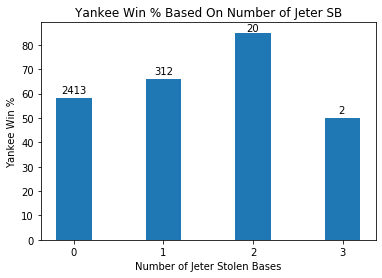

In [365]:
zero_SB = jeter.loc[jeter['SB']==0]
one_SB = jeter.loc[jeter['SB']==1]
two_SB = jeter.loc[jeter['SB']==2]
three_SB = jeter.loc[jeter['SB']==3]
zero_SB["win"].mean()
x = ['0','1','2','3']
z = [zero_SB["win"].mean()*100,one_SB["win"].mean()*100,two_SB["win"].mean()*100,three_SB["win"].mean()*100]
plt.bar(x,z,0.4)
plt.title('Yankee Win % Based On Number of Jeter SB')
plt.xlabel("Number of Jeter Stolen Bases")
plt.ylabel("Yankee Win %")
plt.text(-.14,60,str(zero_SB["SB"].count()))
plt.text(.9,68,str(one_SB["SB"].count()))
plt.text(1.93,85.5,str(two_SB["SB"].count()))
plt.text(2.95,52,str(three_SB["SB"].count()))

Text(0.5, 1.0, 'Scatterplot Comparing Stolen Bases and Wins for Derek Jeter')

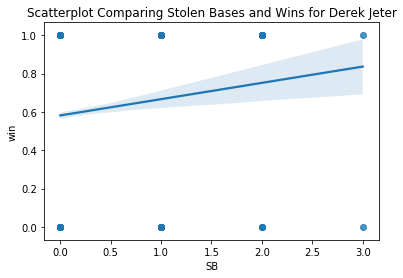

In [366]:
sns.regplot(data = jeter, x = 'SB', y = 'win')
plt.show
plt.title('Scatterplot Comparing Stolen Bases and Wins for Derek Jeter')

##### Logistic Regression for Stolen Bases versus Wins

In [367]:
x = jeter[['SB']].to_numpy()
y = jeter[['win']].to_numpy().ravel()
x_train, x_test, y_train, y_test =  train_test_split(x, y,test_size = 0.25, random_state = 3)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
print("Estimated Slope of Logistic Regression: ", round(log_reg.coef_[0,0],6))

Estimated Slope of Logistic Regression:  0.22164


In [368]:
y_pred = log_reg.predict(x_test)
np.set_printoptions(threshold=np. inf)
print(confusion_matrix(y_test,y_pred,labels=[1, 0]))
print(classification_report(y_test,y_pred,zero_division=0))

[[405   0]
 [282   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.59      1.00      0.74       405

    accuracy                           0.59       687
   macro avg       0.29      0.50      0.37       687
weighted avg       0.35      0.59      0.44       687



In [369]:
#Fits our data into a logistic model
def logmodel(x,y,x_test):
    clf = linear_model.LogisticRegression(C=1e5)
    clf.fit(x,y)
    plt.figure(1, figsize=[8,5])
    plt.clf()
    plt.scatter(x.ravel(),y, color = 'black', zorder = 20)
    loss = expit(x_test*clf.coef_+clf.intercept_).ravel()
    plt.plot(x_test,loss,color='red',linewidth=3)
    ols = linear_model.LinearRegression()
    ols.fit(x,y)
    plt.plot(x_test, ols.coef_*x_test+ols.intercept_,linewidth=1)
    plt.axhline(.5,color='.5')
    plt.ylabel('y')
    plt.xlabel('X')
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.show()

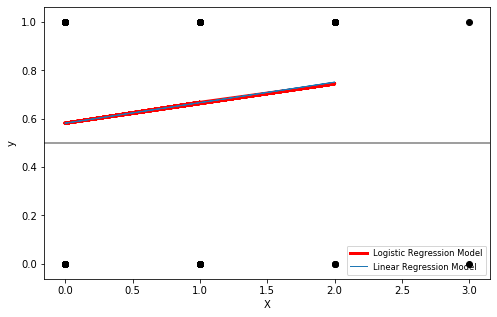

In [370]:
logmodel(x,y,x_test)

##### Linear Regression for Stolen Bases versus Wins

In [371]:
lr = LinearRegression()
model = lr.fit(jeter[['SB']], jeter['win'])
slope = model.coef_[0]
print("The actual linear regression slope of the stolen bases variable is {:.3f}".format(slope))

The actual linear regression slope of the stolen bases variable is 0.085


As shown above, it appears that there is a slight positive correlation between the number of stolen bases Derek Jeter had and the wins of the Yankees. The model has a 0% precision rate when predicting losses and a 59% precision rate when predicting wins, though this information is not very useful, as the model predicts every game will be a win. Looking at the confusion matrix, one can see that the stolen bases statistic was not a good model for determining whether Jeter stealing bases had any impact on the Yankees win rate. It correctly predicted the wins, 405 true positives, but it incorrectly predicted all losses with 282 false negatives (predicted win but actually a loss). Overall, it can be understood that Jeter stealing bases is not an accurate or good predictor for game wins for the Yankees, since by the model's results, it is predicted that every game would be a win regardless of whether or not Jeter stole a base in a given game. Overall though, Jeter's stolen bases may have a small positive impact that is not discernable through this analysis.

## Impact of Walks on Wins

Text(2.95, 81, '21')

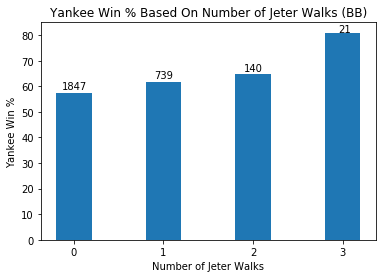

In [441]:
zero_BB = jeter.loc[jeter['BB']==0]
one_BB = jeter.loc[jeter['BB']==1]
two_BB = jeter.loc[jeter['BB']==2]
three_BB = jeter.loc[jeter['BB']==3]
zero_BB["win"].mean()
x = ['0','1','2','3']
z = [zero_BB["win"].mean()*100,one_BB["win"].mean()*100,two_BB["win"].mean()*100,three_BB["win"].mean()*100]
plt.bar(x,z,0.4)
plt.title('Yankee Win % Based On Number of Jeter Walks (BB)')
plt.xlabel("Number of Jeter Walks")
plt.ylabel("Yankee Win %")
plt.text(-.14,59,str(zero_BB["BB"].count()))
plt.text(.9,63,str(one_BB["BB"].count()))
plt.text(1.9,66,str(two_BB["BB"].count()))
plt.text(2.95,81,str(three_BB["BB"].count()))

Text(0.5, 1.0, 'Scatterplot Comparing Walks and Wins for Derek Jeter')

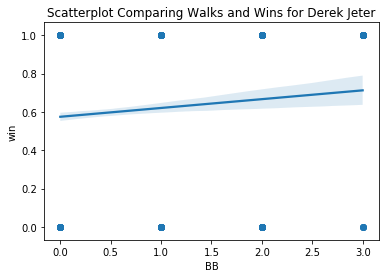

In [373]:
sns.regplot(data = jeter, x = 'BB', y = 'win')
plt.show
plt.title('Scatterplot Comparing Walks and Wins for Derek Jeter')

#### Logistic Regression of Walks versus Wins

In [374]:
x3 = jeter[['BB']].to_numpy()
y3 = jeter[['win']].to_numpy().ravel()
x_train3, x_test3, y_train3, y_test3 =  train_test_split(x3, y3,test_size = 0.25, random_state = 3)
log_reg3 = LogisticRegression()
log_reg3.fit(x_train3,y_train3)
print("Estimated Slope of Logistic Regression: ", round(log_reg3.coef_[0,0],6))

Estimated Slope of Logistic Regression:  0.183199


In [375]:
y_pred3 = log_reg3.predict(x_test3)
np.set_printoptions(threshold=np. inf)
print(confusion_matrix(y_test3,y_pred3,labels=[1,0]))
print(classification_report(y_test3,y_pred3,zero_division=0))

[[405   0]
 [282   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.59      1.00      0.74       405

    accuracy                           0.59       687
   macro avg       0.29      0.50      0.37       687
weighted avg       0.35      0.59      0.44       687



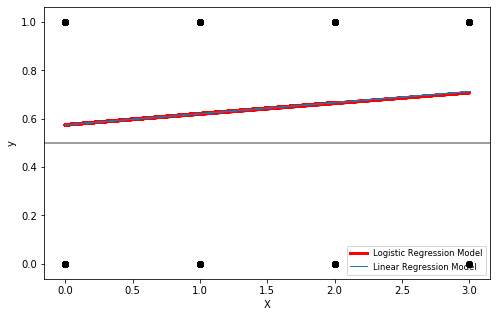

In [376]:
logmodel(x3,y3,x_test3)

##### Linear Regression for Walks versus Wins

In [377]:
lr = LinearRegression()
model3 = lr.fit(jeter[['BB']], jeter['win'])
slope3 = model3.coef_[0]
print("The actual linear regression slope of the walks variable is {:.3f}".format(slope3))

The actual linear regression slope of the walks variable is 0.046


Again it appears that there is a slight positive correlation between the number of walks Derek Jeter had and the wins of the Yankees. But we run into the same situation we had with stolen bases. There is a 0% precision in predicting losses, and a 59% precision in predicting wins, again, this information is not very useful, because the model predicted that every game would be a win. Looking at the confusion matrix, we see that the model predicted that every single game would be a win regardless of whether or not there was a walk in the game. Similarly to stolen bases, it can be understood that Jeter obtaining walks is not a good predictor for game wins for the Yankees, though they may have a small positive impact that is not discernable through this analysis. Next we will look at more influential variables, hits, homeruns, and plate appearances.

## Impact of Hits on Wins

Text(4.95, 100.5, '4')

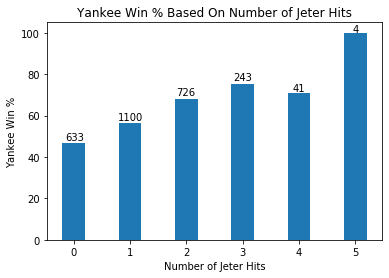

In [491]:
zero_H = jeter.loc[jeter['H']==0]
one_H = jeter.loc[jeter['H']==1]
two_H = jeter.loc[jeter['H']==2]
three_H = jeter.loc[jeter['H']==3]
four_H = jeter.loc[jeter['H']==4]
five_H = jeter.loc[jeter['H']==5]
x = ['0','1','2','3','4','5']
z = [zero_H["win"].mean()*100,one_H["win"].mean()*100,two_H["win"].mean()*100,three_H["win"].mean()*100,four_H["win"].mean()*100,five_H["win"].mean()*100]
plt.bar(x,z,0.4)
plt.title('Yankee Win % Based On Number of Jeter Hits')
plt.xlabel("Number of Jeter Hits")
plt.ylabel("Yankee Win %")
plt.text(-.15,48,str(zero_H["H"].count()))
plt.text(.78,58,str(one_H["H"].count()))
plt.text(1.82,70,str(two_H["H"].count()))
plt.text(2.83,77,str(three_H["H"].count()))
plt.text(3.89,72,str(four_H["H"].count()))
plt.text(4.95,100.5,str(five_H["H"].count()))

Text(0.5, 1.0, 'Scatterplot Comparing Hits and Wins for Derek Jeter')

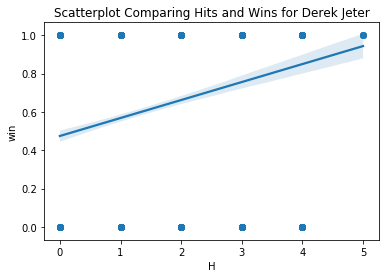

In [379]:
sns.regplot(data = jeter, x = 'H', y = 'win')
plt.show
plt.title('Scatterplot Comparing Hits and Wins for Derek Jeter')

#### Logistic Regression of Hits versus Wins

In [380]:
x2 = jeter[['H']].to_numpy()
y2 = jeter[['win']].to_numpy().ravel()
x_train2, x_test2, y_train2, y_test2 =  train_test_split(x2, y2,test_size = 0.25, random_state = 3)
log_reg2 = LogisticRegression()
log_reg2.fit(x_train2,y_train2)
print("Estimated Slope of Logistic Regression: ", round(log_reg2.coef_[0,0],6))

Estimated Slope of Logistic Regression:  0.401454


In [381]:
y_pred2 = log_reg2.predict(x_test2)
np.set_printoptions(threshold=np. inf)
print(confusion_matrix(y_test2,y_pred2,labels=[1,0]))
print(classification_report(y_test2,y_pred2,zero_division=0))

[[338  67]
 [194  88]]
              precision    recall  f1-score   support

           0       0.57      0.31      0.40       282
           1       0.64      0.83      0.72       405

    accuracy                           0.62       687
   macro avg       0.60      0.57      0.56       687
weighted avg       0.61      0.62      0.59       687



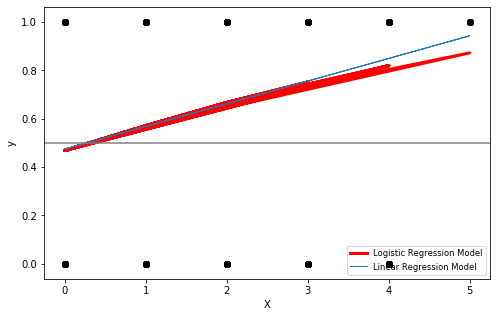

In [382]:
logmodel(x2,y2,x_test2)

#### Linear Regression of Hits versus Wins

In [383]:
lr = LinearRegression()
model2 = lr.fit(jeter[['H']], jeter['win'])
slope2 = model2.coef_[0]
print("The actual linear regression slope of the hits variable is {:.3f}".format(slope2))

The actual linear regression slope of the hits variable is 0.094


It appears once again that there is a positive correlation between the number of hit Derek Jeter had and the wins of the Yankees. Looking at the classification report, we can see that there was 64% precision for predicting wins and 57% percision score for losses. This data is more meaningful, with a weighted f1 score of 59%, meaning that the model was significantly more precise on modeling the win rate based on hits compared to stolen bases or walks. Overall, it can be understood that Jeter getting a hit is a more accurate predictor for game wins for the Yankees.

## Impact of Homeruns on Wins

Text(1.95, 100.5, '10')

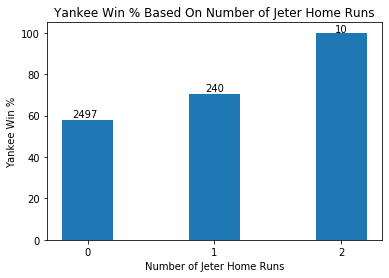

In [510]:
zero_HR = jeter.loc[jeter['HR']==0]
one_HR = jeter.loc[jeter['HR']==1]
two_HR = jeter.loc[jeter['HR']==2]
x = ['0','1','2']
z = [zero_HR["win"].mean()*100,one_HR["win"].mean()*100,two_HR["win"].mean()*100]
plt.bar(x,z,0.4)
plt.title('Yankee Win % Based On Number of Jeter Home Runs')
plt.xlabel("Number of Jeter Home Runs")
plt.ylabel("Yankee Win %")
plt.text(-.12,59,str(zero_HR["HR"].count()))
plt.text(.93,72,str(one_HR["HR"].count()))
plt.text(1.95,100.5,str(two_HR["HR"].count()))

Text(0.5, 1.0, 'Scatterplot Comparing Home Runs and Wins for Derek Jeter')

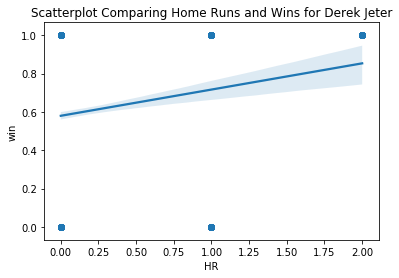

In [385]:
sns.regplot(data = jeter, x = 'HR', y = 'win')
plt.show
plt.title('Scatterplot Comparing Home Runs and Wins for Derek Jeter')

#### Logistic Regression of Homeruns versus Wins

In [386]:
x4 = jeter[['HR']].to_numpy()
y4 = jeter[['win']].to_numpy().ravel()
x_train4, x_test4, y_train4, y_test4 =  train_test_split(x4, y4,test_size = 0.25, random_state = 3)
log_reg4 = LogisticRegression()
log_reg4.fit(x_train4,y_train4)
print("Estimated Slope of Logistic Regression: ", round(log_reg4.coef_[0,0],6))

Estimated Slope of Logistic Regression:  0.685035


In [387]:
y_pred4 = log_reg4.predict(x_test4)
np.set_printoptions(threshold=np. inf)
print(confusion_matrix(y_test4,y_pred4))
print(classification_report(y_test4,y_pred4,zero_division=0))

[[  0 282]
 [  0 405]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.59      1.00      0.74       405

    accuracy                           0.59       687
   macro avg       0.29      0.50      0.37       687
weighted avg       0.35      0.59      0.44       687



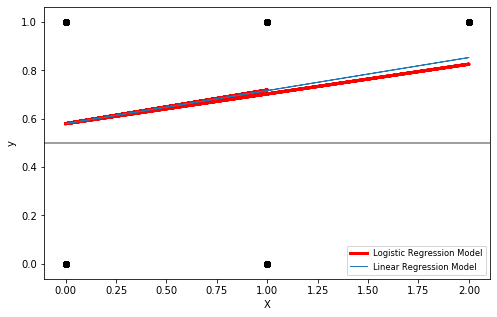

In [388]:
logmodel(x4,y4,x_test4)

#### Linear Regression of Homeruns versus Wins

In [389]:
lr = LinearRegression()
model4 = lr.fit(jeter[['HR']], jeter['win'])
slope4 = model4.coef_[0]
print("The actual linear regression slope of the homerun variable is {:.3f}".format(slope4))

The actual linear regression slope of the homerun variable is 0.137


# ANALYSIS

## Impact of Plate Appearance on Wins

In [390]:
jeter.loc[jeter['PA']==0]

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
13,1995,14,"W,13-3",0,0,0,0,0,NaN,1,1,0,0,0,0
1409,2005,44,"W,5-3",0,0,0,1,0,0.0,1,0,1,0,0,0
1983,2008,149,"W,3-1",0,0,0,0,0,NaN,1,1,0,0,0,0


Text(7.85, 100.5, '5')

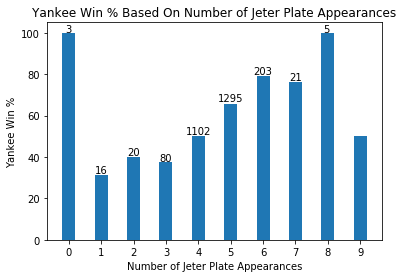

In [543]:
zero_PA = jeter.loc[jeter['PA']==0]
one_PA = jeter.loc[jeter['PA']==1]
two_PA = jeter.loc[jeter['PA']==2]
three_PA = jeter.loc[jeter['PA']==3]
four_PA = jeter.loc[jeter['PA']==4]
five_PA = jeter.loc[jeter['PA']==5]
x = ['0','1','2','3','4','5','6','7','8','9']
z = [zero_PA["win"].mean()*100,one_PA["win"].mean()*100,two_PA["win"].mean()*100,three_PA["win"].mean()*100,four_PA["win"].mean()*100,five_PA["win"].mean()*100,six_PA["win"].mean()*100,seven_PA["win"].mean()*100,eight_PA["win"].mean()*100,nine_PA["win"].mean()*100]
plt.bar(x,z,0.4)
plt.title('Yankee Win % Based On Number of Jeter Plate Appearances')
plt.xlabel("Number of Jeter Plate Appearances")
plt.ylabel("Yankee Win %")
plt.text(-.12,100.5,str(zero_PA["PA"].count()))
plt.text(.8,32,str(one_PA["PA"].count()))
plt.text(1.8,41,str(two_PA["PA"].count()))
plt.text(2.8,38,str(three_PA["PA"].count()))
plt.text(3.61,51,str(four_PA["PA"].count()))
plt.text(4.6,67,str(five_PA["PA"].count()))
plt.text(5.7,80,str(six_PA["PA"].count()))
plt.text(6.8,77,str(seven_PA["PA"].count()))
plt.text(7.85,100.5,str(eight_PA["PA"].count()))


Text(0.5, 1.0, 'Scatterplot Comparing Plate Appearences and Wins for Derek Jeter')

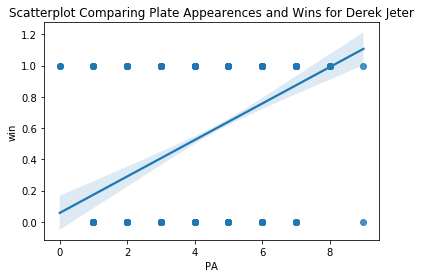

In [392]:
sns.regplot(data = jeter, x = 'PA', y = 'win')
plt.show
plt.title('Scatterplot Comparing Plate Appearences and Wins for Derek Jeter')

#### Logistic Regression of Plate Appearances versus Wins

In [393]:
x5 = jeter[['PA']].to_numpy()
y5 = jeter[['win']].to_numpy().ravel()
x_train5, x_test5, y_train5, y_test5 =  train_test_split(x5, y5,test_size = 0.25, random_state = 3)
log_reg5 = LogisticRegression()
log_reg5.fit(x_train5,y_train5)
print("Estimated Slope of Logistic Regression: ", round(log_reg5.coef_[0,0],6))

Estimated Slope of Logistic Regression:  0.540715


In [394]:
y_pred5 = log_reg5.predict(x_test5)
np.set_printoptions(threshold=np. inf)
print(confusion_matrix(y_test5,y_pred5))
print(classification_report(y_test5,y_pred5,zero_division=0))

[[ 21 261]
 [ 11 394]]
              precision    recall  f1-score   support

           0       0.66      0.07      0.13       282
           1       0.60      0.97      0.74       405

    accuracy                           0.60       687
   macro avg       0.63      0.52      0.44       687
weighted avg       0.62      0.60      0.49       687



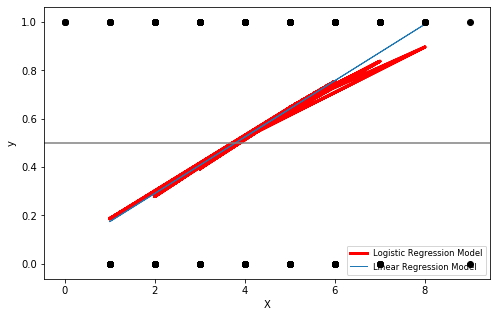

In [395]:
logmodel(x5,y5,x_test5)

#### Linear Regression for Plate Appearances versus Wins

In [396]:
lr = LinearRegression()
model5 = lr.fit(jeter[['PA']], jeter['win'])
slope5 = model5.coef_[0]
print("The actual linear regression slope of the plate appearances variable is {:.3f}".format(slope5))

The actual linear regression slope of the plate appearances variable is 0.117


As you can see in the above graphs and printed linear regression slopes, the Hits, Home Runs, and Plate Appearences variables had the greatest relationship with the wins variable at 0.094, 0.137, and 0.117, respectively.

Of these three variables, it is important to note that although Plate Appearences is technically an individual statistic for Jeter, it is really a representation of the team's offensive success in any given game. If everyone on the team gets on base, that means that no one is recording an out, which enables Jeter to record more plate appearences. For this reason, the Plate Appearences variable is not a major indicator of how Jeter independently contributed to Yankee wins.

Next, some context is important in relation to the Home Runs variable. In creating a baseball lineup, each hitter typically has a specific role based on their offensive strengths. For example, the leadoff hitter's responsibility is to get on base any way possible, while your third or fourth hitters are typically your power hitters who are more likely to hit a home run, thus maximizing scoring potential. Throughout his career, Jeter was a leadoff hitter, so he was not expected to hit many homeruns. Thus, in games where he did record a home run, it provided a somewhat unexpected offensive boost, which logically corresponds to a higher likelihood of a win.

Based off the above logic, it makes sense that Hits would also have a fairly high corelation with Wins because if Jeter does his job, then the Yankees are one step closer to winning each game that they play. As a result of this high corelation and the fact that his primary offensive responsibility was to get on base, this relationship is extremely important.

Thus, Jeter most contributed to Yankee wins via Home Runs and hits.

# ANALYSIS

## Maybe put a bar graph separate to linreg to show data in another way

In [397]:
jeter_total_PA = jeter.PA.sum()
jeter_total_hits = jeter.H.sum()
jeter_hit_to_PA_ratio = jeter_total_hits/jeter_total_PA
print('Derek Jeters ratio of hits per plate appearance is: {:.3f}'.format(jeter_hit_to_PA_ratio))
print('This means that on average it takes Derek Jeter 3.63 plate appearances in order for him to register one hit')
jeter_total_HR = jeter.HR.sum()
print("Derek Jeter's ratio of homeruns to hits is: {:.3f}".format(jeter_total_HR/jeter_total_hits))
print('So this means only every 3.63 plate appearances he gets a hit, and only every 0.075 hits he gets a homerun.')
print('The percentage that Jeter gets a homerun when he is up to bat: {:,.2%}'.format(jeter_total_HR/jeter_total_PA))

Derek Jeters ratio of hits per plate appearance is: 0.275
This means that on average it takes Derek Jeter 3.63 plate appearances in order for him to register one hit
Derek Jeter's ratio of homeruns to hits is: 0.075
So this means only every 3.63 plate appearances he gets a hit, and only every 0.075 hits he gets a homerun.
The percentage that Jeter gets a homerun when he is up to bat: 2.06%


This is a very low percentage for homeruns, but as we know Jeter is not a power hitter so this makes sense. Now we will look at Jeter over each year of his career to get more details about his performance.

# Derek Jeter Yearly Stats

In [398]:
def totals_per_year(stat):
    np.arange(jeter["Year"].min(),jeter["Year"].max())
    num_year = jeter.groupby('Year').sum()
    years_played = jeter["Year"].unique()
    plt.bar(x = years_played, height = num_year[stat])
    plt.xlabel('Years')
    plt.ylabel(stat)
    plt.title("Jeter's "+stat+ " Totals per Year")
    plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
    plt.show()

In [399]:
#This function returns the top three statistical years for a given category named by a parameter called stat1
def top_three_stat_years(stat1):
    num_year = jeter.groupby('Year').sum()
    stat1_ranking = num_year[stat1].rank()
    stat1_sorted = sorted(stat1_ranking, reverse = True)
    print('The year Jeter had the most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[0]].index.values[0]))
    print('The year Jeter had the second most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[1]].index.values[0]))
    print('The year Jeter had the third most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[2]].index.values[0]))

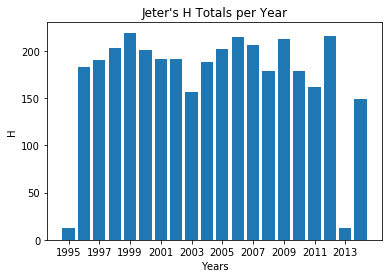

In [400]:
totals_per_year('H')

In [401]:
top_three_stat_years('H')

The year Jeter had the most H was 1999
The year Jeter had the second most H was 2012
The year Jeter had the third most H was 2006


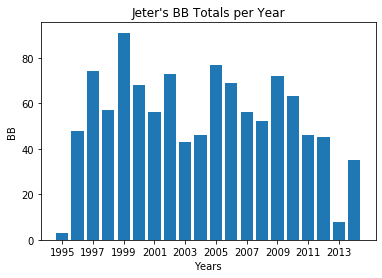

In [402]:
totals_per_year('BB')

In [403]:
top_three_stat_years('BB')

The year Jeter had the most BB was 1999
The year Jeter had the second most BB was 2005
The year Jeter had the third most BB was 1997


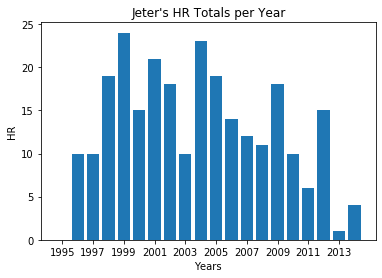

In [404]:
totals_per_year('HR')

In [405]:
top_three_stat_years('HR')

The year Jeter had the most HR was 1999
The year Jeter had the second most HR was 2004
The year Jeter had the third most HR was 2001


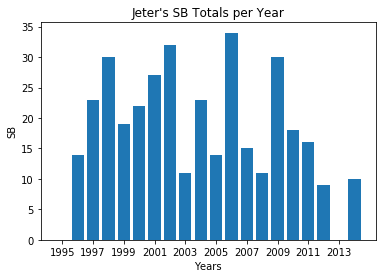

In [406]:
totals_per_year('SB')

In [407]:
top_three_stat_years('SB')

The year Jeter had the most SB was 2006
The year Jeter had the second most SB was 2002
The year Jeter had the third most SB was 1998


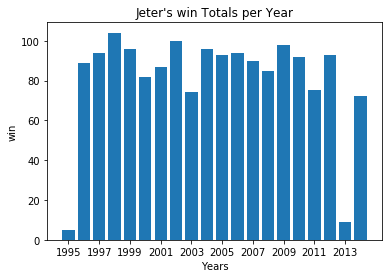

In [408]:
totals_per_year('win')

In [409]:
top_three_stat_years('win')

The year Jeter had the most win was 1998
The year Jeter had the second most win was 2002
The year Jeter had the third most win was 2009


Derek Jeter's best year of performance was 1999, where he had his career high hits, walks, and homeruns. 

To further look at Jeter's contributions and importance to the NY Yankees, will will be using his 1999 season to compare to other players in the same season. This will allow us to compare his batting statistics with other players who batted similarly well in 1999 (according to ESPN's batting leaders 1999 https://www.espn.com/mlb/history/leaders/_/breakdown/season/year/1999) to see if he contributed more to a team win than other players who also batted well. 

The reset_index applied to jeter_1999 resets the index of the new dataframe to zero so that it may be compared to players Williams and Garciaparra later on. Indicies with identical starting points are required for direct comparison.

In [410]:
jeter_1999 = jeter.loc[jeter['Year'] == 1999]
jeter_1999 = jeter_1999.reset_index(drop = True)
jeter_1999.head()

,Year,Rk,Rslt,PA,H,HR,SB,BB,WPA,win,0SB,1SB,2SB,3SB,4SB
0,1999,1,"L,3-5",4,3,1,0,0,0.239,0,1,0,0,0,0
1,1999,2,"W,7-4",5,3,0,0,0,0.137,1,1,0,0,0,0
2,1999,3,"W,4-0",5,1,0,0,0,-0.043,1,1,0,0,0,0
3,1999,4,"W,12-3",4,0,0,0,2,0.001,1,1,0,0,0,0
4,1999,5,"W,5-0",5,1,0,0,1,0.083,1,1,0,0,0,0


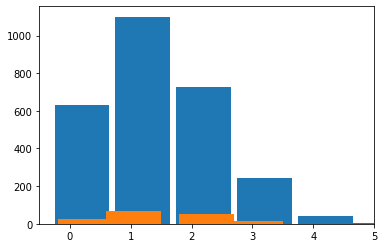

In [411]:
plt.hist(jeter['H'], align = 'left',width=.9)
plt.hist(jeter_1999['H'], align = "left",  width=.9)
plt.show()

We have modeled the distribution of Jeter's hits in his career compared to the distribution of his hits in 1999, one of his best hitting seasons. Although the distribution roughly follows the same shape, the discrepancy between one hit games and two hit games is proportionally smaller in the 1999 season, leading us to the conclusion that Jeter had more multi-hit games in this season compared to his career average.

In [412]:
# does 1999 data conform to poisson distribution?
print(jeter_1999['H'].mean(), jeter_1999['H'].var())

1.3860759493670887 0.7608239941949533


In probability theory and statistics, the Poisson distribution, named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. A characteristic of a Poisson Distribution is when the mean and the variance are similar. Based on these findings, it is unlikely that a Poisson Distribution is plausible.

In [413]:
# is the observed variance plausibly compatible with poisson?
season_vars = np.zeros(1000)
for season in range(1000):
   season_vars[season] = np.random.poisson(jeter_1999['H'].mean(), size=len(jeter_1999['H'])).var()

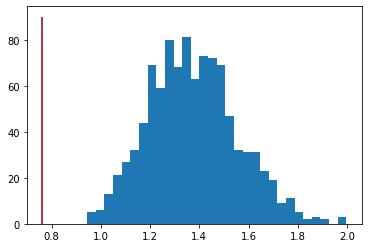

In [414]:
plt.hist(season_vars, bins=30)
plt.vlines(x=jeter_1999['H'].var(), ymin=0, ymax=90, color='darkred')
plt.show()

This histogram shows confirms our fears that our data does not fit a Poisson Distribution. This means Jeter's performance is not independent of each other. This means we could not predict his performance as it is not consistent.

# Comparing Jeter to Rodriguez

##### Jeter's Impact on Wins When Stealing 1 Base

In [415]:
lr = LinearRegression()
model = lr.fit(jeter[['1SB']], jeter['win'])
slope = model.coef_[0]
print("The regression slope of the stolen bases variable is {:.2f}".format(slope))

The regression slope of the stolen bases variable is 0.08


##### Rodriguez's Impact on Wins When Stealing 1 Base

In [416]:
lr = LinearRegression()
model = lr.fit(rodriguez[['1SB']], rodriguez['win'])
slope = model.coef_[0]
print("The regression slope of the stolen bases variable is {:.2f}".format(slope))

The regression slope of the stolen bases variable is 0.09


##### Analysis
According to these calculated numbers, when Derek Jeter had 1 steal in a game, he had a minimally lesser impact on the wins of his team than when Alex Rodriguez had 1 steal in a game. Examining the regression slopes relating wins to 1 stolen bases, Jeter's is 0.08 while Rodriguez's is 0.09. Although small, Rodriguez contributed to the team wins slightly more than Jeter.

##### Comparing the PA to Hit ratio of Rodriguez and Jeter

In [417]:
rodriguez_total_PA = rodriguez.PA.sum()
rodriguez_total_hits = rodriguez.H.sum()
rodriguez_hit_to_PA_ratio = rodriguez_total_hits/rodriguez_total_PA
print("Alex Rodriguez's career hit to plate appearance ratio is {:.3f}".format(rodriguez_hit_to_PA_ratio))
print("Derek Jeter's career hit to plate appearance ration is {:.3f}".format(jeter_hit_to_PA_ratio))

Alex Rodriguez's career hit to plate appearance ratio is 0.255
Derek Jeter's career hit to plate appearance ration is 0.275


##### Analysis
This means that Derek Jeter is on average a more efficient hitter, registering more hits per plate appearance than Alex Rodriguez. But what about in each of their best seasons? Which of these two greats was greater in their prime?

In [418]:
def top_three_stat_years_arod(stat1):
    num_year = rodriguez.groupby('Year').sum()
    stat1_ranking = num_year[stat1].rank()
    stat1_sorted = sorted(stat1_ranking, reverse = True)
    print('The year Rodriguez had the most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[0]].index.values[0]))
    print('The year Rodriguez had the second most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[1]].index.values[0]))
    print('The year Rodriguez had the third most '+ stat1 +  ' was',str(num_year[stat1_ranking == stat1_sorted[2]].index.values[0]))

In [419]:
top_three_stat_years_arod('H')

The year Rodriguez had the most H was 1996
The year Rodriguez had the second most H was 1998
The year Rodriguez had the third most H was 2001


In [420]:
top_three_stat_years_arod('HR')

The year Rodriguez had the most HR was 2002
The year Rodriguez had the second most HR was 2007
The year Rodriguez had the third most HR was 2001


In [421]:
top_three_stat_years_arod('win')

The year Rodriguez had the most win was 2004
The year Rodriguez had the second most win was 2005
The year Rodriguez had the third most win was 2006


Alex Rodriguez's best year for hitting was 1996, and Derek Jeter's best hitting year was 1999, so let's compare the hit to PA ratio of the two between these two years to see who was greater in their prime.

In [422]:
rodriguez_1996 = rodriguez.loc[rodriguez.Year == 1996]
#rodriguez calculations
rodriguez_total_PA_1996 = rodriguez_1996.PA.sum()
rodriguez_total_hits_1996 = rodriguez_1996.H.sum()
rodriguez_hit_to_PA_ratio_1996 = rodriguez_total_hits_1996/rodriguez_total_PA_1996
print("Alex Rodriguez's hit to PA ratio in his greatest year of hitting (1996) was: {:.2f}".format(rodriguez_hit_to_PA_ratio_1996))
#jeter calculations
jeter_total_PA_1999 = jeter_1999.PA.sum()
jeter_total_hits_1999 = jeter_1999.H.sum()
jeter_hit_to_PA_ratio_1999 = jeter_total_hits_1999/jeter_total_PA_1999
print("Derek Jeter's hit to PA ratio in his greatest year of hitting (1999) was: {:.2f}".format(jeter_hit_to_PA_ratio_1999))

Alex Rodriguez's hit to PA ratio in his greatest year of hitting (1996) was: 0.32
Derek Jeter's hit to PA ratio in his greatest year of hitting (1999) was: 0.30


##### Analysis
What we can tell from this information is that in their primes, Alex Rodriguez was a more efficient hitter than Derek Jeter, registering a hit about every 3.13 times he was at bat, whereas Jeter registered a hit about every 3.33 times he was at bat, not too far off, but definitely less. Did this difference affect how much these players helped their team win? The limitations of our data limit the conclusion we can make but Rodriguez once again comes out on top of Jeter.

# Comparing Jeter to Williams and Garciaparra

Now after selecting the same variables as we used with Jeter, we can use these statistics to compare the contribution that Jeter made to players Bernie Williams and Nomar Garciaparra, who batted similarly well in the 1999 season. (Jeter's best statistical season)

In [423]:
print('Jeter total wins in 1999: ', jeter_1999.win.sum())
print('Williams total wins in 1999: ', williams.win.sum())
print('Garciaparra total wins in 1999: ', garciaparra.win.sum())

Jeter total wins in 1999:  96
Williams total wins in 1999:  96
Garciaparra total wins in 1999:  80


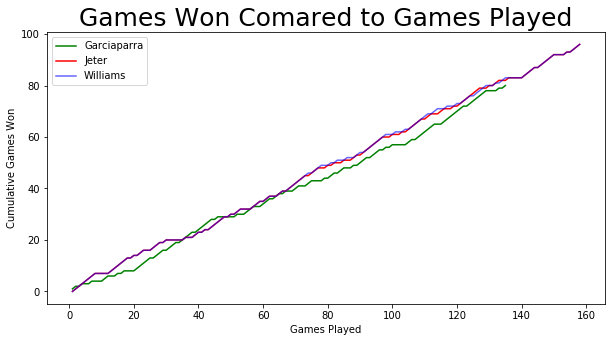

In [424]:
plt.figure(figsize=(10,5))
plt.plot(garciaparra['Rk'], np.cumsum(garciaparra['win']), color = 'green', label='Garciaparra')
plt.plot(jeter_1999['Rk'], np.cumsum(jeter_1999['win']), color = 'red', label='Jeter')
plt.plot(williams['Rk'], np.cumsum(williams['win']), color = 'blue', alpha = 0.6, label='Williams')
plt.ylabel('Cumulative Games Won')
plt.xlabel('Games Played')
plt.title('Games Won Comared to Games Played', fontsize=25)
plt.legend()
plt.show()

From this initial analysis of total wins vs total games played for the 1999 season for all of these players, we can see that the green line, representing Garciaparra has the lowest slope meaning the lowest number of wins. But Jeter and Williams, the red line and blue line, are neck and neck throughout the season. At the end it is still unclear who has more wins from the graph although we found above Jeter and Williams both have 96, but now we will move on to further compare these players to clear up this discrepancy.

In [425]:
print('Jeter total hits in 1999: ', jeter_1999.H.sum())
print('Williams total hits in 1999: ', williams.H.sum())
print('Garciaparra total hits in 1999: ', garciaparra.H.sum())

Jeter total hits in 1999:  219
Williams total hits in 1999:  202
Garciaparra total hits in 1999:  190


When looking at total hits, Jeter had the most hits in the 1999 season but also played in more games than the rest of the players. But a hit does not gain a point in the game of baseball. What does? Homeruns.

In [426]:
print('Jeter total homeruns in 1999: ', jeter_1999.HR.sum())
print('Williams total homeruns in 1999: ', williams.HR.sum())
print('Garciaparra total homeruns in 1999: ', garciaparra.HR.sum())

Jeter total homeruns in 1999:  24
Williams total homeruns in 1999:  25
Garciaparra total homeruns in 1999:  27


Jeter homerun to hit ratio in 1999: 0.1096
Williams homerun to hit ratio in 1999: 0.1238
Garciaparra homerun to hit ratio in 1999: 0.1421


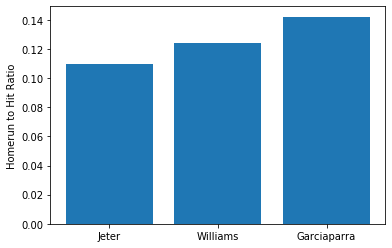

In [427]:
print('Jeter homerun to hit ratio in 1999: {:.4f}'.format(jeter_1999.HR.sum()/jeter_1999.H.sum()))
print('Williams homerun to hit ratio in 1999: {:.4f}'.format(williams.HR.sum()/williams.H.sum()))
print('Garciaparra homerun to hit ratio in 1999: {:.4f}'.format(garciaparra.HR.sum()/garciaparra.H.sum()))

data = [['Jeter', jeter_1999.HR.sum()/jeter_1999.H.sum()], ['Williams', williams.HR.sum()/williams.H.sum()], ['Garciaparra', garciaparra.HR.sum()/garciaparra.H.sum()]]
ratios = pd.DataFrame(data, columns = ['Name', 'Ratio'])
plt.bar(x=ratios['Name'], height=ratios['Ratio'])
plt.ylabel('Homerun to Hit Ratio')
plt.show()

Using the total homeruns and hits from each player, we calculated the ratio of homeruns to hits. This number represents the probability that if a player records a hit, it is a home run. Jeter's is less than Williams's, whom has the next lowest. This still makes sense, as Jeter was never a power hitter. 

Derek Jeter although finishing on top with wins and hits falls short when it comes to homeruns. Only having 24 homeruns for his peak season may seem like Jeter was not as beneficaial of a player as he gets recognition for. However, it is important to note that Williams and Garciaparra were both middle of the lineup players who typically hit with more power, while Jeter was a leadoff man who's primary offensive goal was to get on base in order to get driven in by the players who were more likely to record an extra base hit, allowing Jeter to score from any base.

# Conclusion and Interpretations

Jeter's total WPA over the 1999 season:  6.173
Williams' total WPA over the 1999 season: 2.719
Garciaparra's total WPA over the 1999 season:  2.35
Rodriguez's total WPA over the 1996 season:  4.001


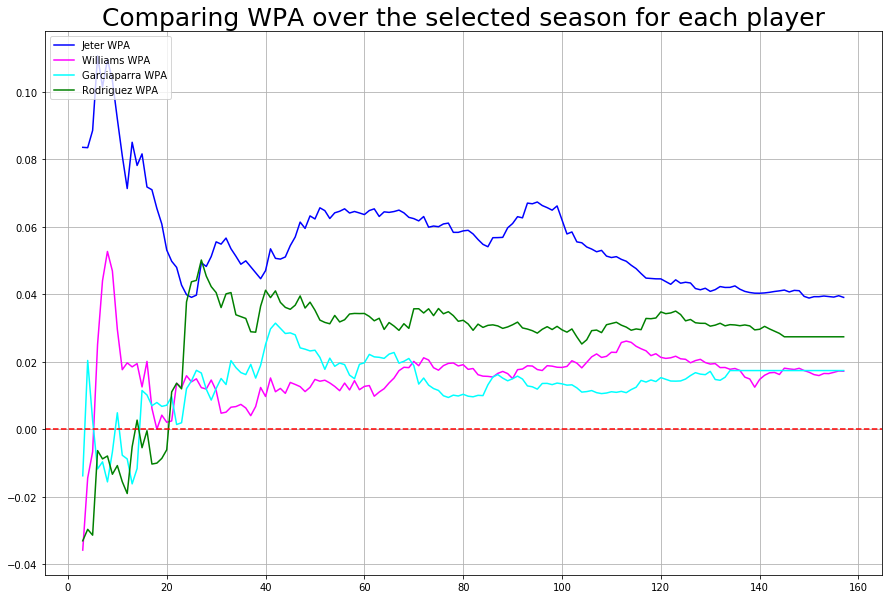

In [428]:
compare_WPA = pd.DataFrame(columns = ['Jeter', 'Williams', 'Garciaparra', 'Rodriguez'])

rodriguez_1996 = rodriguez_1996.reset_index(drop = True)

compare_WPA['Jeter'] = jeter_1999.WPA
compare_WPA['Williams'] = williams.WPA
compare_WPA['Garciaparra'] = garciaparra.WPA
compare_WPA['Rodriguez'] = rodriguez_1996.WPA

print("Jeter's total WPA over the 1999 season: ", compare_WPA['Jeter'].sum())
print("Williams' total WPA over the 1999 season: {:.3f}".format(compare_WPA['Williams'].sum()))
print("Garciaparra's total WPA over the 1999 season: ", compare_WPA['Garciaparra'].sum())
print("Rodriguez's total WPA over the 1996 season: ", compare_WPA['Rodriguez'].sum())

compare_WPA['Jeter_4'] = compare_WPA['Jeter'].expanding(min_periods=4).mean()
compare_WPA['Williams_4'] = compare_WPA['Williams'].expanding(min_periods=4).mean()
compare_WPA['Garciaparra_4'] = compare_WPA['Garciaparra'].expanding(min_periods=4).mean()
compare_WPA['Rod_4'] = compare_WPA['Rodriguez'].expanding(min_periods=4).mean()
compare_WPA.head()

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(compare_WPA['Jeter_4'],label='Jeter WPA', color='blue')


plt.grid(True)
plt.plot(compare_WPA['Williams_4'],label='Williams WPA', color='magenta')

plt.grid(True)
plt.plot(compare_WPA['Garciaparra_4'],label='Garciaparra WPA', color='cyan')

plt.grid(True)
plt.plot(compare_WPA['Rod_4'],label='Rodriguez WPA', color='green')

plt.axhline(y=0, color='red', linestyle='dashed')

plt.title('Comparing WPA over the selected season for each player', fontsize=25)
plt.legend(loc=2)
plt.show()

This plot includes the moving averages for Jeter, Garciaparra, and Williams for the 1999 season, and Rodriguez for the 1996 season. In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. The moving average is mostly used with time series data to capture the short-term fluctuations while focusing on longer trends. We used this to smoothen the data and make the trends more clear. WPA meaning win probability added will be negative for a loss and postive for a win. We added in a dashed line when the WPA equals zero to see if the player contributed positively or negatively for the majority of the season. Jeter seems to have the most positive contributions, next Rodriguez, then Williams, and finally Garciaparra. And looking at the total sum of the players WPA over the selected season, Jeter contributes significantly more with a sum of over 6, while Rodriguez is only around 4, and the other 2 players are below 3. 


Looking broadly at these four players this makes sense. Although we found that Jeter is not an all star hitter, overall through contributions besides homeruns and the recorded stats we used, he has contributed more towards the Yankees wins than Rodriguez, Williams and Garciaparra. He may have been less valuable when up to bat, but he made up for it through his fielding performance. Although he still contributed through his batting, just was not a leading hitter.
